### Importing necessary libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# Suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Import the data

In [121]:
cars = pd.read_csv('dataset/car_price.csv')
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [122]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [123]:
cars.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

- Fuel_Type: ['Petrol' 'Diesel' 'CNG']
- Seller_Type: ['Dealer' 'Individual']
- Transmission: ['Manual' 'Automatic']
- Owner: [0 1 3] (No. of Previous Owners)

### Data Wrangling

#### Encode the data

In [124]:
le = LabelEncoder()

cars['Fuel_Type'] = le.fit_transform(cars['Fuel_Type'])
cars['Seller_Type'] = le.fit_transform(cars['Seller_Type'])
cars['Transmission'] = le.fit_transform(cars['Transmission'])

### Fit the model

##### Separate the data into features and target variables and then split them

In [125]:
X = cars.drop(columns=['Car_Name','Selling_Price'])
y = cars['Selling_Price']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### Simple Linear Regression Model

In [127]:
lr = LinearRegression()

lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [128]:
print("R2 Score:",str(round(r2_score(y_test,y_pred),3)*100)+'%')

R2 Score: 87.7%


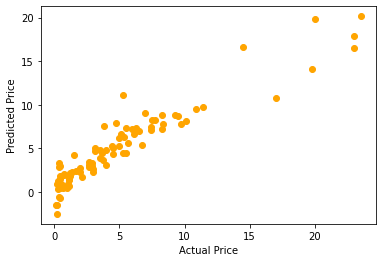

In [129]:
plt.scatter(y_test,y_pred,color='orange')
plt.xlabel('Actual Price'), plt.ylabel('Predicted Price')
plt.show()

#### Lasso Regression

In [130]:
alphas = np.geomspace(1e-9,1e0,10)
scores = []

for alpha in alphas:

    las = Lasso(alpha=alpha, max_iter=100000)

    las = las.fit(X_train, y_train)
    y_pred = las.predict(X_test)

    score = r2_score(y_test, y_pred)
    scores.append(score)

list(zip(alphas,scores))

[(1e-09, 0.877317503075331),
 (1e-08, 0.8773175034482781),
 (1e-07, 0.8773175071777293),
 (1e-06, 0.8773175444712336),
 (1e-05, 0.8773179172948473),
 (0.0001, 0.8773216343321035),
 (0.001, 0.8773576806208548),
 (0.01, 0.8776062977176909),
 (0.1, 0.8684366992376731),
 (1.0, 0.8396199056735946)]

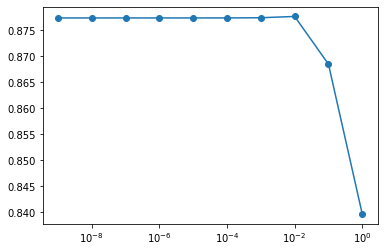

In [131]:
plt.semilogx(alphas, scores, 'o-')

#### Lasso Regression using Cross Validation

In [132]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [133]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

scores = []
alphas = np.geomspace(0.001,10,5)

for alpha in alphas:

    las = Lasso(alpha=alpha, max_iter=100000)

    estimator  = Pipeline([("make_higher_deg",pf),("scaler",s),("lasso_regression",las)])

    y_pred = cross_val_predict(estimator, X, y, cv=kf)

    score = r2_score(y, y_pred)
    scores.append(score)

list(zip(alphas,scores))

[(0.001, -0.18404001907688028),
 (0.01, 0.9307165002382137),
 (0.1, 0.8657395298431587),
 (1.0, 0.7588464290867657),
 (10.0, -0.0023983732799570667)]

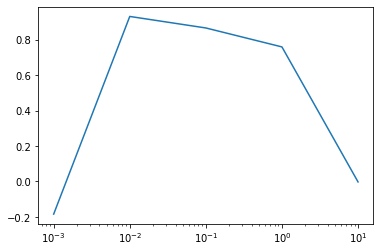

In [134]:
plt.semilogx(alphas,scores)

#### Ridge Regression using Cross Validation

In [135]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

scores = []
alphas = np.geomspace(0.1,2,20)

for alpha in alphas:

    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator  = Pipeline([("make_higher_deg",pf),("scaler",s),("lasso_regression",ridge)])

    y_pred = cross_val_predict(estimator, X, y, cv=kf)

    score = r2_score(y, y_pred)
    scores.append(score)

list(zip(alphas,scores))

[(0.1, 0.1250732196206965),
 (0.11707799137227792, 0.18466013859647246),
 (0.13707256063767184, 0.24697889397724304),
 (0.16048180071713392, 0.31115288283008746),
 (0.1878888687976823, 0.3761279985670065),
 (0.2199765136004211, 0.44070862686203527),
 (0.25754408361413883, 0.5036112612983705),
 (0.30152743999357373, 0.5635322193691067),
 (0.35302227018072674, 0.6192233950058684),
 (0.41331138302441095, 0.6695683127896541),
 (0.48389666535796244, 0.713650422016538),
 (0.566536496118536, 0.750806688282285),
 (0.6632895500464653, 0.7806617846691717),
 (0.7765660821766217, 0.8031409305829391),
 (0.909187970690782, 0.8184619954210296),
 (1.0644590138831427, 0.827109392329893),
 (1.2462472324355405, 0.8297933770518805),
 (1.4590812272681346, 0.8273987773652787),
 (1.7082629933755134, 0.8209271942403275),
 (2.0, 0.8114365902877361)]

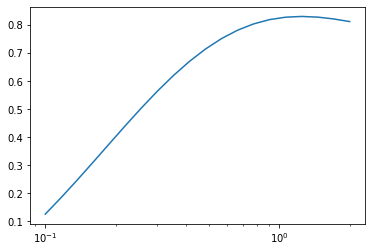

In [136]:
plt.semilogx(alphas,scores)

### Best Model
After testing different models and tuning the hyperparameters, the best model is created which gives an accuracy of 94.66%

In [139]:
best_estimator = Pipeline([("Polynomial Features", PolynomialFeatures(degree=2)),("scaler",s),("lasso_regression",Lasso(alpha=0.0123, max_iter=100000))])    # After some trial and error

predictions = cross_val_predict(best_estimator, X, y, cv=kf)
print("R2 Score:",str(round(r2_score(y,predictions),4)*100)+'%')

R2 Score: 94.66%


#### Making Predictions

In [155]:
# X = [Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]

X_input = np.array([[2011, 6.34, 21000, 0, 0, 1, 0]])
las = Lasso(alpha=0.0123, max_iter=100000)

las = las.fit(X_train, y_train)
y_pred = las.predict(X_input)

print(f"The current price of the car is ₹{round(y_pred[0], 2)} Lakhs")

The current price of the car is ₹5.91 Lakhs
